In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

# Loading the Dataset

In [ ]:
path = 'healthcare-dataset-stroke-data.csv'
data = pd.read_csv(path)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

### Shape of the data

First thing we need to know the shape of our data
How many examples and features do we have?

In [ ]:
nrow= data.shape[0]
ncol=len(data.columns)

print(nrow, ncol)

5110 12


### Types of different Columns


 Check the type of each feature.

In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Dealing with categorical variables

 Use the .value_counts() functions to walk through the categorical variables that we have to see the categories and the counts of each of them.

In [ ]:
smoking_types = data.smoking_status.value_counts()
smoking_types

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
residence_types =data.Residence_type.value_counts()
residence_types

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
work_types =data.work_type.value_counts()
work_types

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
married_types =data.ever_married.value_counts()
married_types

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
hypertension =data.hypertension.value_counts()
hypertension

0    4612
1     498
Name: hypertension, dtype: int64

In [ ]:
heart_disease= data.heart_disease.value_counts()
heart_disease

0    4834
1     276
Name: heart_disease, dtype: int64

In [ ]:
stroke=data.stroke.value_counts()
stroke

0    4861
1     249
Name: stroke, dtype: int64

# Preprocessing

### Dealing with Nulls

 The bmi column contains nulls. Fill it with the appropriate measure.

In [ ]:
data['bmi'].fillna( data['bmi'].mean(), inplace=True)
print(data) #just to check

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

#### Encoding Categorical Features

 Here you have to encode those categorical variables to be able to use them to train your DL model.

In [ ]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
data['smoking_status'] =preprocessing.LabelEncoder().fit_transform(data['smoking_status'])
data['Residence_type'] =preprocessing.LabelEncoder().fit_transform(data['Residence_type'])
data['work_type'] = preprocessing.LabelEncoder().fit_transform(data['work_type'])
data['ever_married'] =preprocessing.LabelEncoder().fit_transform(data['ever_married'])
data['gender'] = preprocessing.LabelEncoder().fit_transform(data['gender'])

print(data)

         id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
0             2               1             228.69  36

### Normalizing Features

 Normalize the input data

In [ ]:
data = data/data.max()
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.500656,0.207143,0.527154,0.097456,0.054012,0.656164,0.541928,0.508023,0.390622,0.296037,0.458969,0.048728
std,0.290125,0.246522,0.275764,0.296607,0.226063,0.475034,0.272573,0.499985,0.166643,0.078873,0.357178,0.215320
min,0.000919,0.000000,0.000976,0.000000,0.000000,0.000000,0.000000,0.000000,0.202841,0.105533,0.000000,0.000000
25%,0.243231,0.000000,0.304878,0.000000,0.000000,0.000000,0.500000,0.000000,0.284261,0.243852,0.000000,0.000000
50%,0.506334,0.000000,0.548780,0.000000,0.000000,1.000000,0.500000,1.000000,0.338136,0.290984,0.666667,0.000000
75%,0.749685,0.500000,0.743902,0.000000,0.000000,1.000000,0.750000,1.000000,0.419850,0.336066,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Removing Unnecessary Features

 From the features that you have, remove the feature(s) that is(are) irrelevant to your predictions.

In [ ]:
data = data.drop( ['id'], axis=1)

print(data)

      gender       age  hypertension  heart_disease  ever_married  work_type  \
0        0.5  0.817073           0.0            1.0           1.0       0.50   
1        0.0  0.743902           0.0            0.0           1.0       0.75   
2        0.5  0.975610           0.0            1.0           1.0       0.50   
3        0.0  0.597561           0.0            0.0           1.0       0.50   
4        0.0  0.963415           1.0            0.0           1.0       0.75   
...      ...       ...           ...            ...           ...        ...   
5105     0.0  0.975610           1.0            0.0           1.0       0.50   
5106     0.0  0.987805           0.0            0.0           1.0       0.75   
5107     0.0  0.426829           0.0            0.0           1.0       0.75   
5108     0.5  0.621951           0.0            0.0           1.0       0.50   
5109     0.0  0.536585           0.0            0.0           1.0       0.00   

      Residence_type  avg_glucose_level

# Building the DL Model

Now it's time to build the actual model, and observe a summary of it.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(32, input_dim=10, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 1065 (4.16 KB)
Trainable params: 1065 (4.1

### Compiling the model

  Now we compile the model. Here we want to measure the accuracy as well as the precision and recall to know better about the performance of our model.

In [ ]:
model.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()          ])

### Fitting the model

 Split the data and train the model

We take the first columns as features and the last column as a label, then we split our dataset between training (70%) and testing (30%).

In [ ]:
from sklearn.model_selection import train_test_split

x = data.iloc[:,:-1]
y = data.iloc[:, -1]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, stratify=y)

we fit the model on 80% training data, and validate on the rest. Later we will do the final test on the test data. The training happens for 15 epochs.

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
112/112 [==============================] - 2s 7ms/step - loss: 0.6613 - accuracy: 0.9008 - precision: 0.0585 - recall: 0.0690 - val_loss: 0.6158 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
112/112 [==============================] - 0s 4ms/step - loss: 0.3834 - accuracy: 0.9514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2121 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
112/112 [==============================] - 0s 3ms/step - loss: 0.2083 - accuracy: 0.9514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1981 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
112/112 [==============================] - 0s 4ms/step - loss: 0.1954 - accuracy: 0.9514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1878 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
112/112 [============================

# Improving DL Models

Suggest ways to improve your model

### Checking For Data Imbalance

We check for imbalance because we have a poor recall and precision.

We have a huge imbalance in the data, this is why we fix it with oversamppling and undersampling.

We will oversample this time using the SMOTE() function instead of random oversampling, and this is because SMOTE will generate new data based on the data that we have, so we avoid overfitting.

(array([3403.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3403.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

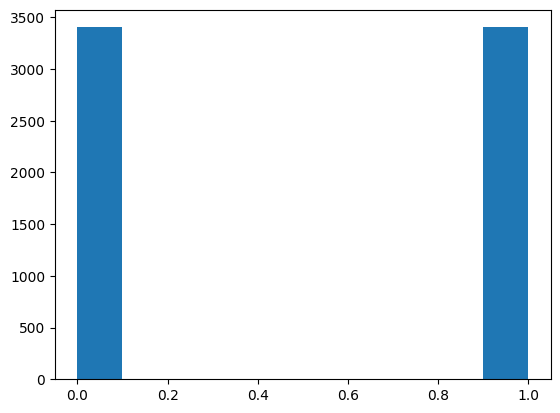

In [ ]:
from imblearn.over_sampling import SMOTE

over = SMOTE()
x_new, y_new = over.fit_resample(x_train, y_train)


plt.hist([y_new])

Split the balanced dataset between 90% (training and validation), 10% testing
Then divide the 90% between 80% training and 20% validation

In [ ]:
from sklearn.model_selection import train_test_split


x_train_val, x_test, y_train_val, y_test = train_test_split(x_new, y_new, test_size=0.1, stratify=y_new)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, stratify=y_train_val)

Now we will train the model on the balanced data, and tune it on the validation set

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
154/154 [==============================] - 0s 3ms/step - loss: 0.5932 - accuracy: 0.5376 - precision: 0.8172 - recall: 0.0967 - val_loss: 0.5385 - val_accuracy: 0.7951 - val_precision: 0.8110 - val_recall: 0.7700
Epoch 2/15
154/154 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7902 - precision: 0.7797 - recall: 0.8090 - val_loss: 0.4979 - val_accuracy: 0.8122 - val_precision: 0.7924 - val_recall: 0.8467
Epoch 3/15
154/154 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.7990 - precision: 0.7642 - recall: 0.8649 - val_loss: 0.4788 - val_accuracy: 0.8033 - val_precision: 0.7555 - val_recall: 0.8972
Epoch 4/15
154/154 [==============================] - 0s 3ms/step - loss: 0.4707 - accuracy: 0.8051 - precision: 0.7582 - recall: 0.8959 - val_loss: 0.4619 - val_accuracy: 0.8082 - val_precision: 0.7625 - val_recall: 0.8956
Epoch 5/15
154/154 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.8055 - pr

Evaluate your model on the test set that you kept aside at the beginning.

In [ ]:
model.evaluate(x_test, y_test)

22/22 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.8429 - precision: 0.7920 - recall: 0.9294


[0.386578768491745, 0.8428781032562256, 0.791979968547821, 0.929411768913269]

We see that the performance gets better when our data became balanced.
Now we will try improving our model with other techniques that we learned through the week.

### Model Design

We will introduce batch normalization after each layer and then train the model

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(32, input_dim=10, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_2 (Bat  (None, 8)                

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

history2 = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
154/154 [==============================] - 4s 6ms/step - loss: 0.6521 - accuracy: 0.6490 - precision: 0.7183 - recall: 0.4902 - val_loss: 0.6700 - val_accuracy: 0.6539 - val_precision: 0.8039 - val_recall: 0.4078
Epoch 2/15
154/154 [==============================] - 1s 6ms/step - loss: 0.5743 - accuracy: 0.7716 - precision: 0.7983 - recall: 0.7269 - val_loss: 0.6135 - val_accuracy: 0.6914 - val_precision: 0.8426 - val_recall: 0.4715
Epoch 3/15
154/154 [==============================] - 1s 6ms/step - loss: 0.5130 - accuracy: 0.7884 - precision: 0.7947 - recall: 0.7776 - val_loss: 0.4912 - val_accuracy: 0.8237 - val_precision: 0.8186 - val_recall: 0.8320
Epoch 4/15
154/154 [==============================] - 1s 5ms/step - loss: 0.4654 - accuracy: 0.8088 - precision: 0.7952 - recall: 0.8318 - val_loss: 0.4228 - val_accuracy: 0.8318 - val_precision: 0.8225 - val_recall: 0.8467
Epoch 5/15
154/154 [==============================] - 1s 5ms/step - loss: 0.4439 - accuracy: 0.8169 - pr

In [ ]:
model.evaluate(x_test, y_test)

22/22 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.8693 - precision: 0.8575 - recall: 0.8853


[0.31961503624916077,
 0.8693098425865173,
 0.8575498461723328,
 0.8852941393852234]

We see that we are achieving better metrics with batch normalization.